# Sessió 5.1: Arbres de decisió i random forests

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

## Conjunts de dades d'exemple

### Conjunt per a classificació (Iris)


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_y = pd.Series(iris.target_names[iris.target], name="species").astype("category")
iris_df = pd.concat((iris_X, iris_y), axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
iris_scaler = StandardScaler()
iris_scaler.fit(iris_X)
iris_X_std = iris_scaler.transform(iris_X)

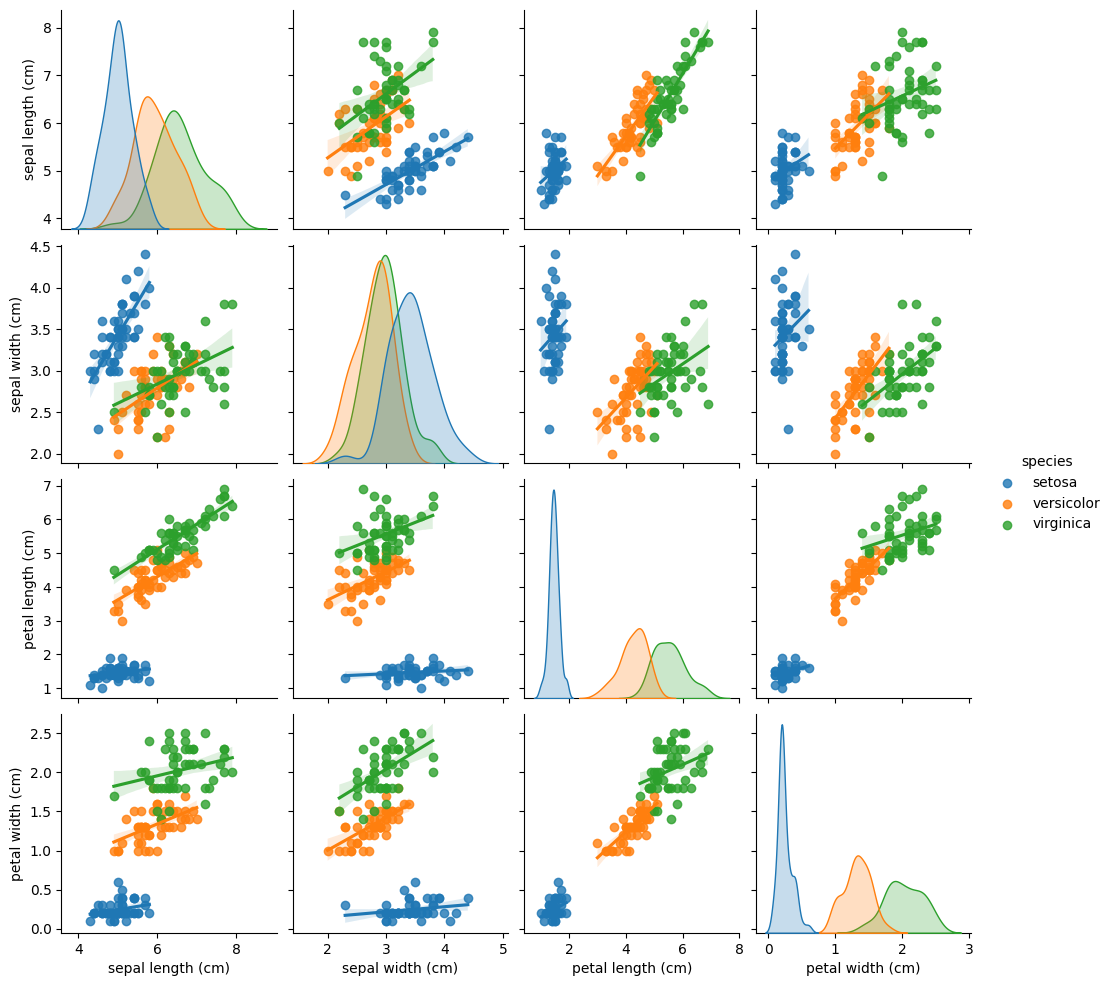

In [ ]:
sns.pairplot(iris_df, kind="reg", hue="species");

### Conjunt per a regressió (Diamants)


- `carat` weight of the diamond (0.2--5.01)
- `cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color` diamond colour, from J (worst) to D (best)
- `clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table` width of top of diamond relative to widest point (43--95)
- `price` price in US dollars (\$326--\$18,823)
- `x` length in mm (0--10.74)
- `y` width in mm (0--58.9)
- `z` depth in mm (0--31.8)


In [ ]:
diam_df = sns.load_dataset("diamonds")
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diam_df["cut"] = diam_df["cut"].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
diam_df["color"] = diam_df["color"].map({'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6})
diam_df["clarity"] = diam_df["clarity"].map({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,1,61.0,58.0,2757,6.15,6.12,3.74


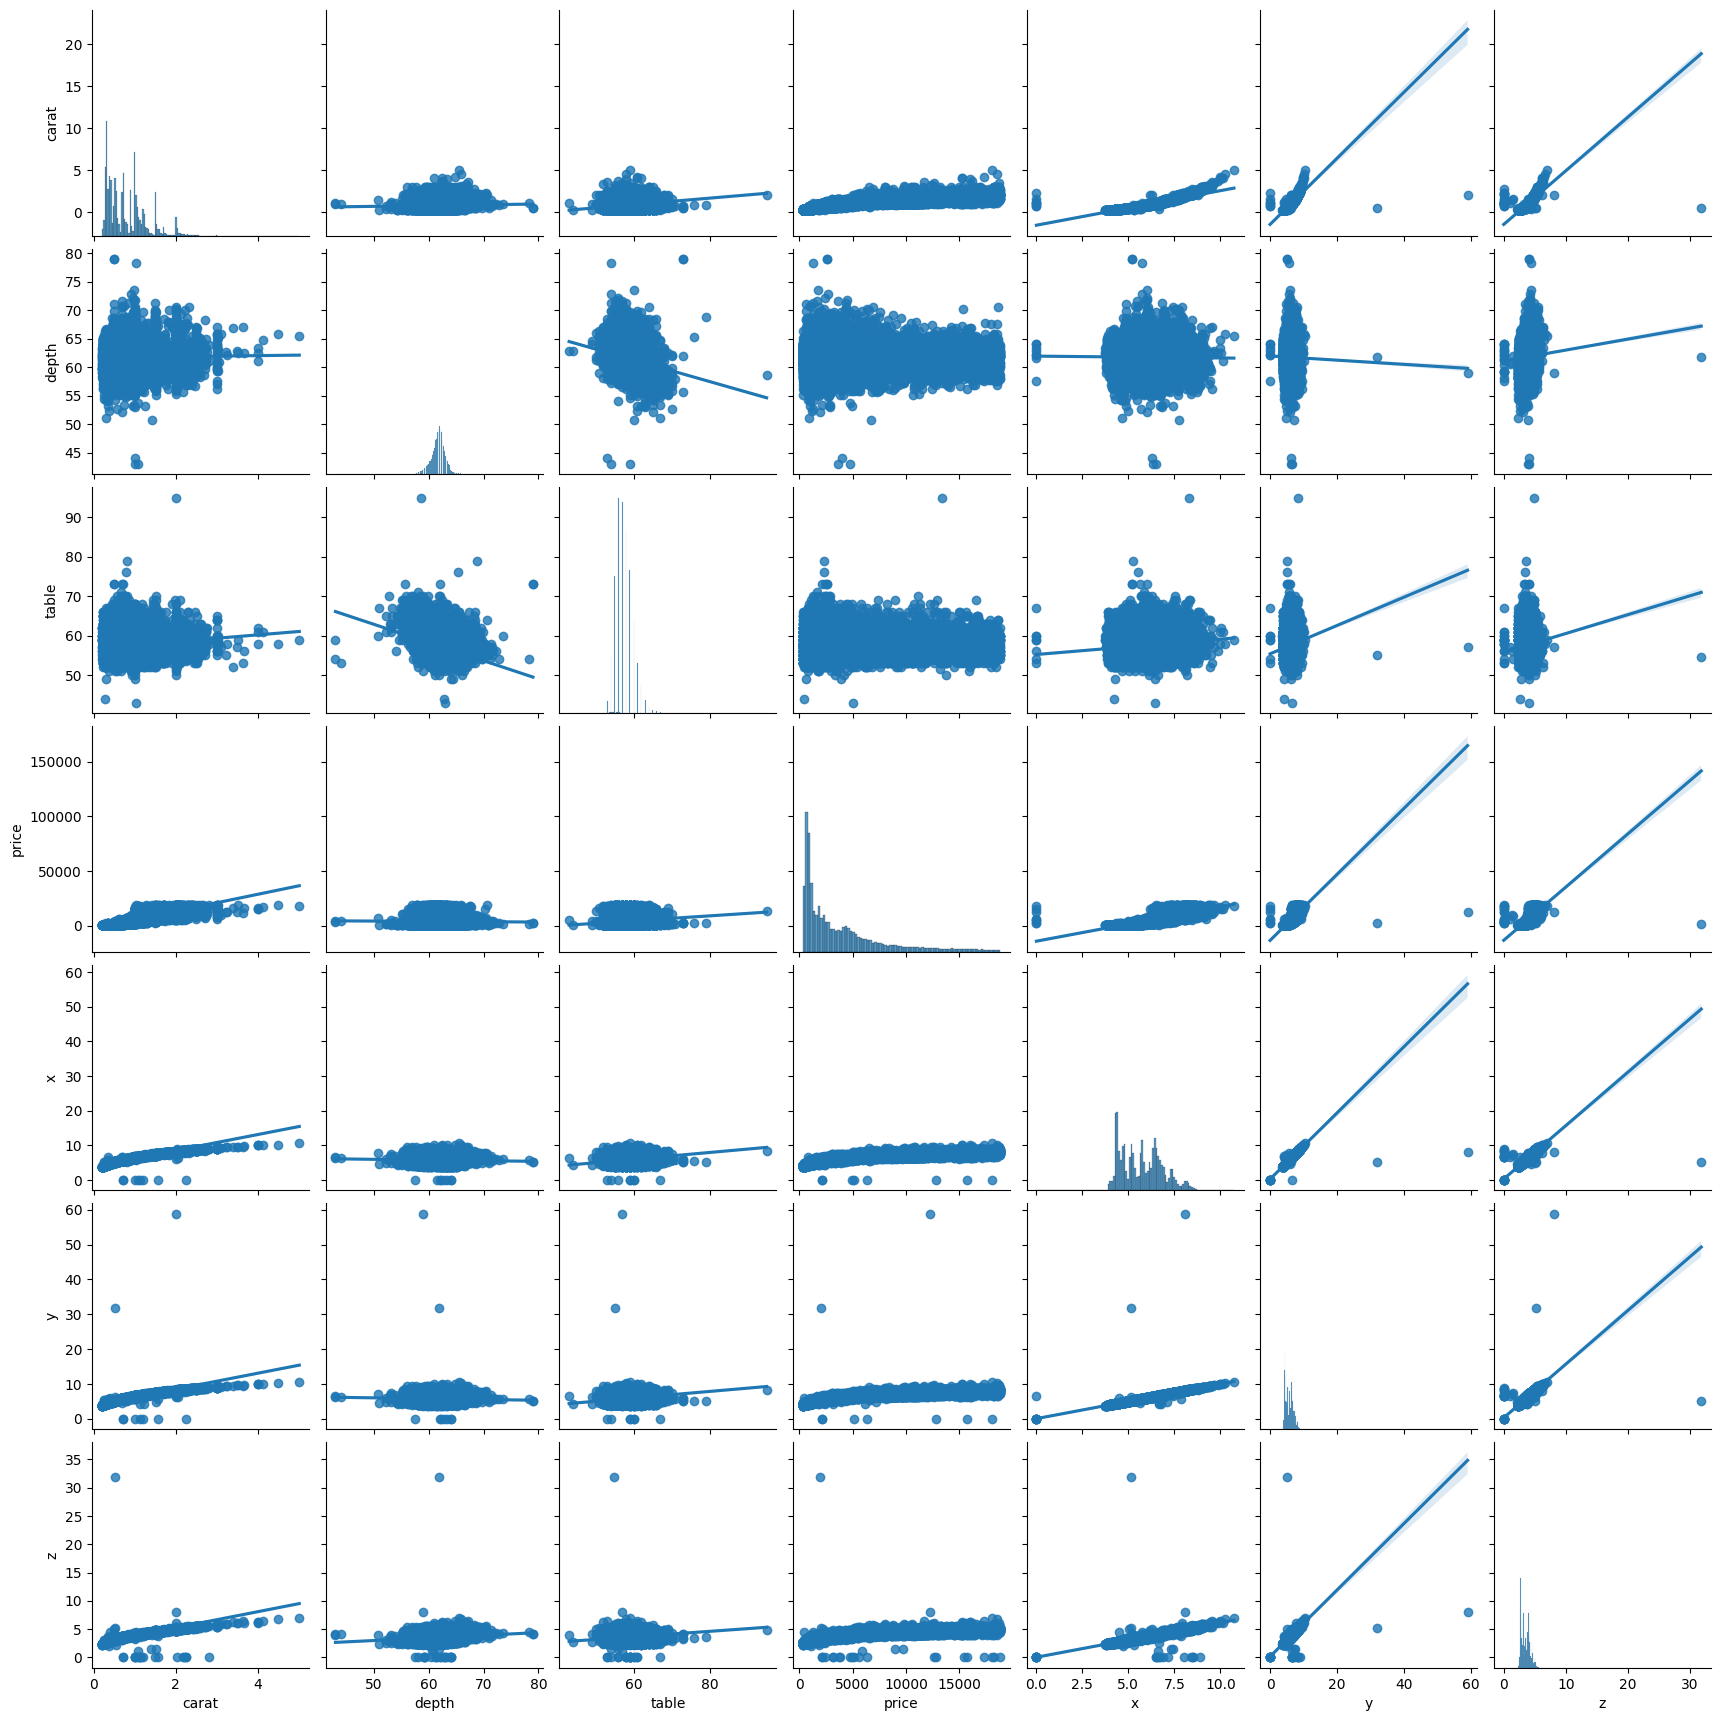

In [ ]:
sns.pairplot(diam_df, kind="reg");

<ipython-input-8-9334e6a906c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diam_df.corr().round(2), vmin=-1, vmax=1, square=True, annot=True);


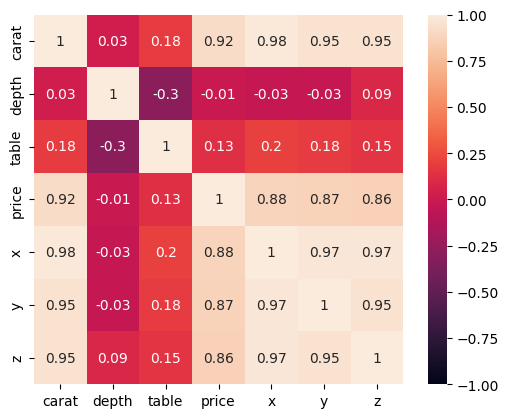

In [ ]:
sns.heatmap(diam_df.corr().round(2), vmin=-1, vmax=1, square=True, annot=True);

In [ ]:
diam_X = diam_df.loc[:, diam_df.columns != "price"]
diam_y = diam_df["price"]

In [ ]:
diam_scaler = StandardScaler()
diam_scaler.fit(diam_X)
diam_X_std = diam_scaler.transform(diam_X)

## Arbres de decisió

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

### Classificació

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=1000)
round(cross_val_score(lr, iris_X, iris_y, cv=5).mean(), 4)

0.9733

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
round(cross_val_score(dtc, iris_X, iris_y, cv=5).mean(), 4)

0.96

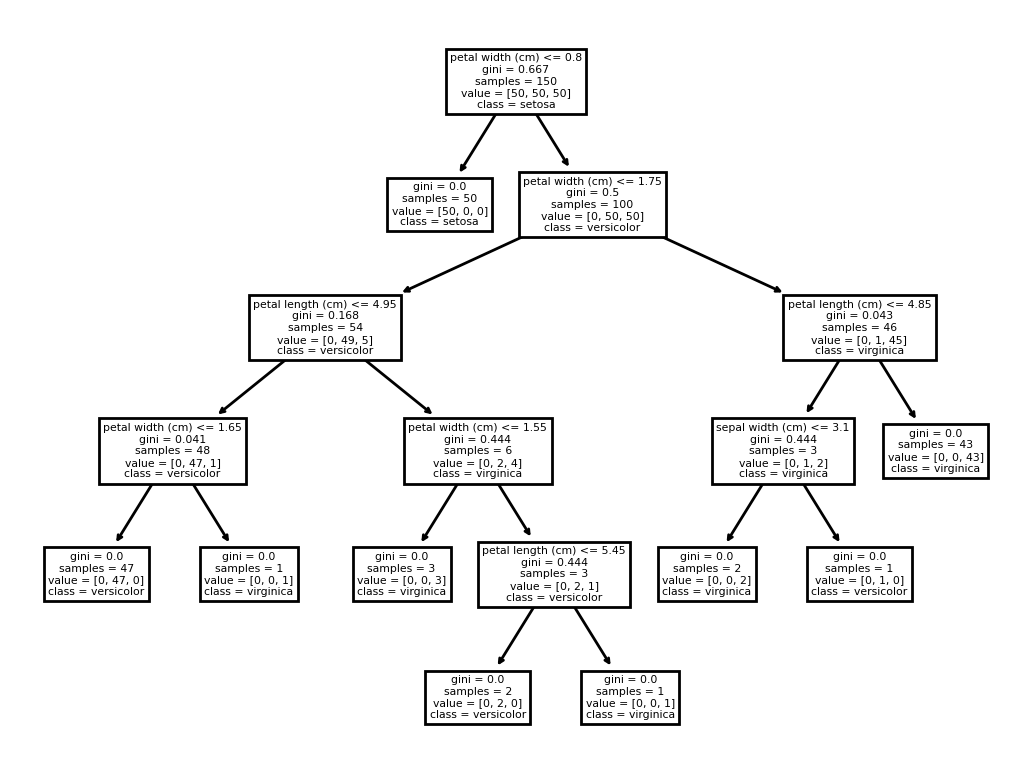

In [ ]:
dtc.fit(iris_X, iris_y)
plt.figure(dpi=200)
plot_tree(dtc, impurity=True, class_names=iris.target_names, feature_names=iris.feature_names);

In [ ]:
cut_dtc = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=2)
round(cross_val_score(cut_dtc, iris_X, iris_y, cv=5).mean(), 4)

0.9333

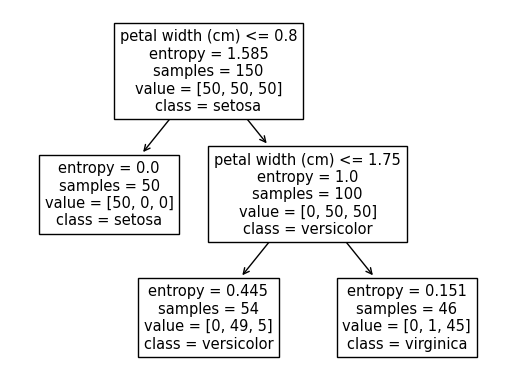

In [ ]:
cut_dtc.fit(iris_X, iris_y)
plot_tree(cut_dtc, impurity=True, class_names=iris.target_names, feature_names=iris.feature_names);

In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

tree_to_code(cut_dtc, iris.feature_names)

def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
  if petal width (cm) <= 0.800000011920929:
    return [[50.  0.  0.]]
  else:  # if petal width (cm) > 0.800000011920929
    if petal width (cm) <= 1.75:
      return [[ 0. 49.  5.]]
    else:  # if petal width (cm) > 1.75
      return [[ 0.  1. 45.]]


In [ ]:
dtc_std = DecisionTreeClassifier(random_state=0)
round(cross_val_score(dtc_std, iris_X_std, iris_y, cv=5).mean(), 4)

0.96

### Regressió

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=0)
-round(cross_val_score(ridge, diam_X_std, diam_y, cv=5, scoring="neg_mean_squared_error").mean(), 4)

2606988.7545

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)
-round(cross_val_score(dtr, diam_X_std, diam_y, cv=5, scoring="neg_mean_squared_error").mean(), 4)

3947156.1794

In [ ]:
dtr.fit(diam_X, diam_y)
dtr.tree_.node_count

91087

In [ ]:
dtr_small = DecisionTreeRegressor(random_state=0, max_leaf_nodes=10)
-round(cross_val_score(dtr_small, diam_X_std, diam_y, cv=5, scoring="neg_mean_squared_error").mean(), 4)

6250906.7935

In [ ]:
dtr_small.fit(diam_X, diam_y)
dtr_small.tree_.node_count

19

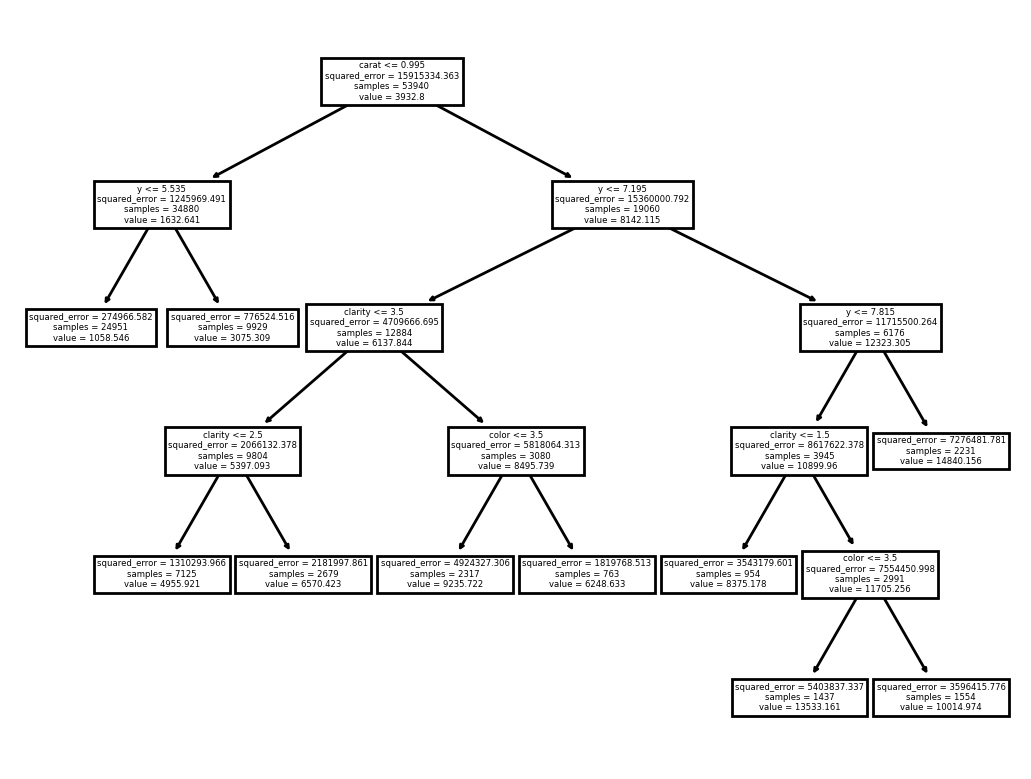

In [ ]:
plt.figure(dpi=200)
plot_tree(dtr_small, impurity=True, feature_names=diam_X.columns);

## Random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### Classificació

In [ ]:
rfc = RandomForestClassifier(random_state=0)
round(cross_val_score(rfc, iris_X_std, iris_y, cv=5).mean(), 4)

0.9667

In [ ]:
rfc.fit(iris_X_std, iris_y)
importances = dict(zip(iris_X.columns, rfc.feature_importances_))
importances

{'sepal length (cm)': 0.09090795402103087,
 'sepal width (cm)': 0.024531041234715757,
 'petal length (cm)': 0.46044473961715215,
 'petal width (cm)': 0.42411626512710127}

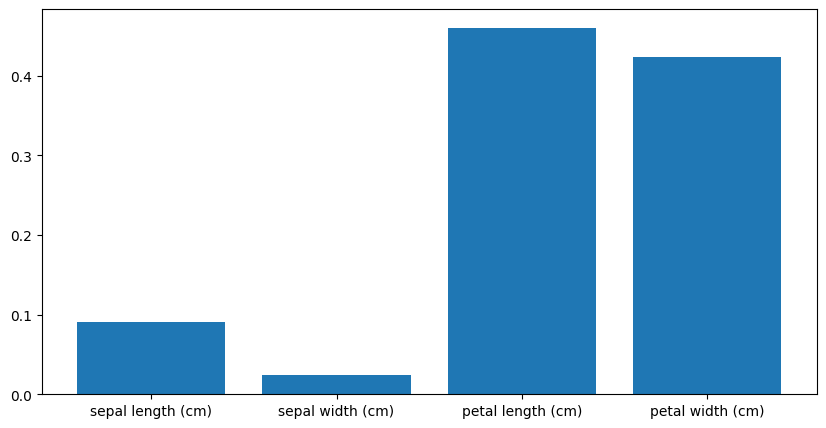

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(*zip(*importances.items()));

### Regressió

In [ ]:
rfr = RandomForestRegressor(random_state=0)
-round(cross_val_score(rfr, diam_X_std, diam_y, cv=5, scoring="neg_mean_squared_error").mean(), 4)

3447831.1445

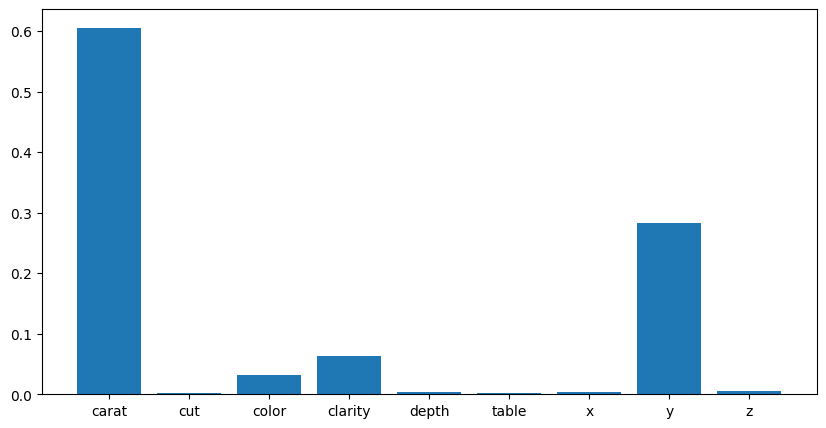

In [ ]:
rfr.fit(diam_X_std, diam_y)
importances = dict(zip(diam_X.columns, rfr.feature_importances_))
plt.figure(figsize=(10, 5))
plt.bar(*zip(*importances.items()));

## Exercicis

* Utilitza el conjunt de dades de les enquestes (`responses.csv`) per fer classificació de nois i noies. Primer amb un arbre de decisió, i després amb un random forest.
* Compara el rendiment a partir de validació creuada.
* Prova i visualitza diferents profunditats de l'arbre de decisió. Interpreta els resultats.